In [0]:
%reload_ext autoreload
%autoreload 2

import torch
import fastai
from fastai import vision
from fastai import widgets as util

In [0]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('device:', device)

fastai.core.defaults.device = torch.device(device)

if device == 'cuda':
    vision.torch.backends.cudnn.benchmark = True

In [0]:
path = vision.untar_data(vision.URLs.CIFAR)
path.ls()

[PosixPath('/root/.fastai/data/cifar10/labels.txt'),
 PosixPath('/root/.fastai/data/cifar10/test'),
 PosixPath('/root/.fastai/data/cifar10/train')]

In [0]:
!ls /root/.fastai/data/cifar10/train

airplane  automobile  bird  cat  deer  dog  frog  horse  ship  truck


In [0]:
ds_tfms = ([*vision.rand_pad(4, 32), vision.flip_lr(p=0.5)], [])
data = vision.ImageDataBunch.from_folder(path, valid='test', 
                                         ds_tfms=ds_tfms, 
                                         bs=512,
                                         seed=1).normalize(vision.cifar_stats)

In [0]:
print(dir(vision.models))

['BasicBlock', 'Darknet', 'DynamicUnet', 'ResLayer', 'ResNet', 'SqueezeNet', 'UnetBlock', 'WideResNet', 'XResNet', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'alexnet', 'darknet', 'densenet121', 'densenet161', 'densenet169', 'densenet201', 'resnet101', 'resnet152', 'resnet18', 'resnet34', 'resnet50', 'squeezenet1_0', 'squeezenet1_1', 'unet', 'vgg16_bn', 'vgg19_bn', 'wrn', 'wrn_22', 'xception', 'xresnet', 'xresnet101', 'xresnet152', 'xresnet18', 'xresnet34', 'xresnet50']


In [0]:
model = vision.models.wrn_22()
model

In [0]:
learn = vision.Learner(data, model, metrics=vision.accuracy).to_fp16()

In [0]:
learn.fit_one_cycle(cyc_len=10, max_lr=3e-3, wd=0.4, div_factor=10, pct_start=0.5)

epoch,train_loss,valid_loss,accuracy,time
0,1.493828,1.282302,0.541200,02:35
1,1.152130,1.263978,0.554200,02:25
2,0.936988,1.073083,0.644300,02:25
3,0.779350,1.035767,0.645700,02:25
4,0.654730,0.922866,0.686100,02:25
5,0.561180,0.753423,0.752300,02:25
6,0.468107,0.480582,0.835300,02:25
7,0.366420,0.378909,0.875200,02:25
8,0.275687,0.287139,0.902400,02:25
9,0.208621,0.268808,0.909900,02:25


In [0]:
learn.fit_one_cycle(cyc_len=15, max_lr=3e-3, wd=0.2, div_factor=10, pct_start=0.5, start_epoch=10)

epoch,train_loss,valid_loss,accuracy,time
10,0.346346,0.594152,0.810900,02:24
11,0.281875,0.424713,0.860400,02:25
12,0.210818,0.270077,0.910200,02:25
13,0.153122,0.244744,0.921100,02:25
14,0.124051,0.236589,0.923200,02:25


In [0]:
interp = vision.ClassificationInterpretation.from_learner(learn)

In [0]:
print(dir(interp))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'confusion_matrix', 'data', 'ds', 'ds_type', 'from_learner', 'learn', 'losses', 'most_confused', 'plot_confusion_matrix', 'plot_multi_top_losses', 'plot_top_losses', 'pred_class', 'preds', 'top_losses', 'y_true']


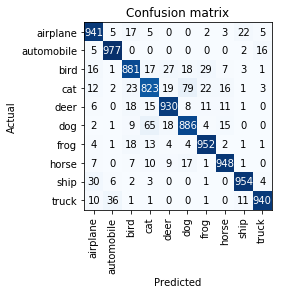

In [0]:
interp.plot_confusion_matrix()

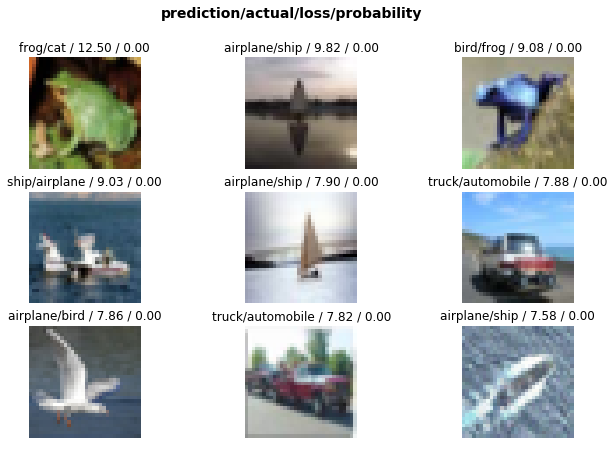

In [0]:
interp.plot_top_losses(9, figsize=(11, 7))

In [0]:
vision.doc(interp.top_losses)

In [0]:
learn.save('Resnet18-CIFAR', return_path=True)

PosixPath('/root/.fastai/data/cifar10/models/Resnet18-CIFAR.pth')

In [0]:
learn.load('Resnet18-CIFAR')

# New model

In [0]:
path = vision.untar_data(vision.URLs.PETS)
path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
!ls /root/.fastai/data/oxford-iiit-pet/annotations

list.txt  README  test.txt  trainval.txt  trimaps  xmls


In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [0]:
f_names = vision.get_image_files(path_img)
f_names[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_180.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/english_setter_186.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pug_106.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_87.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_183.jpg')]

In [0]:
pattern = r'/([^/]+)_\d+.jpg$'

In [0]:
data = vision.ImageDataBunch.from_name_re(path_img, f_names, pattern, 
                                          ds_tfms=vision.get_transforms(), 
                                          size=224,
                                          seed=5).normalize(vision.imagenet_stats)

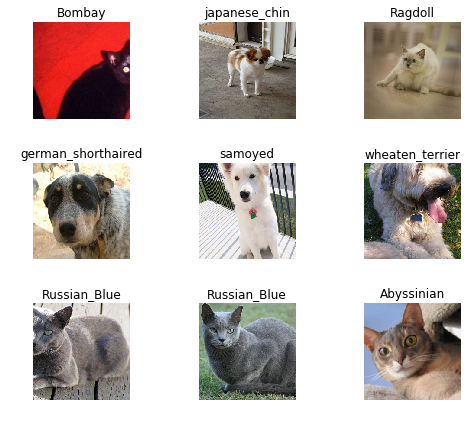

In [0]:
data.show_batch(3, figsize=(7, 6))

In [0]:
img = vision.open_image(image_file)
img.show(figsize=(5, 5))

In [0]:
print(data.classes)
print(len(data.classes))
print(data.c)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']
37
37


In [0]:
learner = vision.learner.cnn_learner(data, 
                                     vision.models.resnet50, 
                                     metrics=vision.error_rate).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:00<00:00, 105872141.23it/s]


In [0]:
learner.unfreeze()

In [0]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


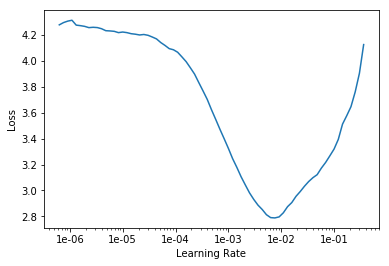

In [0]:
learner.recorder.plot()

In [0]:
max_lr = slice(3e-4, 1e-2)

In [0]:
learner.fit_one_cycle(cyc_len=10, max_lr=max_lr)

epoch,train_loss,valid_loss,error_rate,time
0,0.695362,0.693021,0.200271,01:23
1,1.022706,2.478555,0.506089,01:22
2,1.172444,2.516075,0.545332,01:23
3,0.941755,1.116663,0.324087,01:23
4,0.775531,0.855347,0.258457,01:22
5,0.592043,0.638835,0.194181,01:23
6,0.442625,0.436107,0.141407,01:23
7,0.304199,0.358040,0.119080,01:23
8,0.184829,0.274220,0.086604,01:23
9,0.133370,0.259991,0.083221,01:22


In [0]:
interp = vision.ClassificationInterpretation.from_learner(learner)

In [0]:
def val_accuracy(interp):
    arr = [(true == pred).item() for true, pred in zip(interp.y_true, interp.pred_class)]
    return float(sum(arr) / len(arr))

val_accuracy(interp)

0.9167794316644113

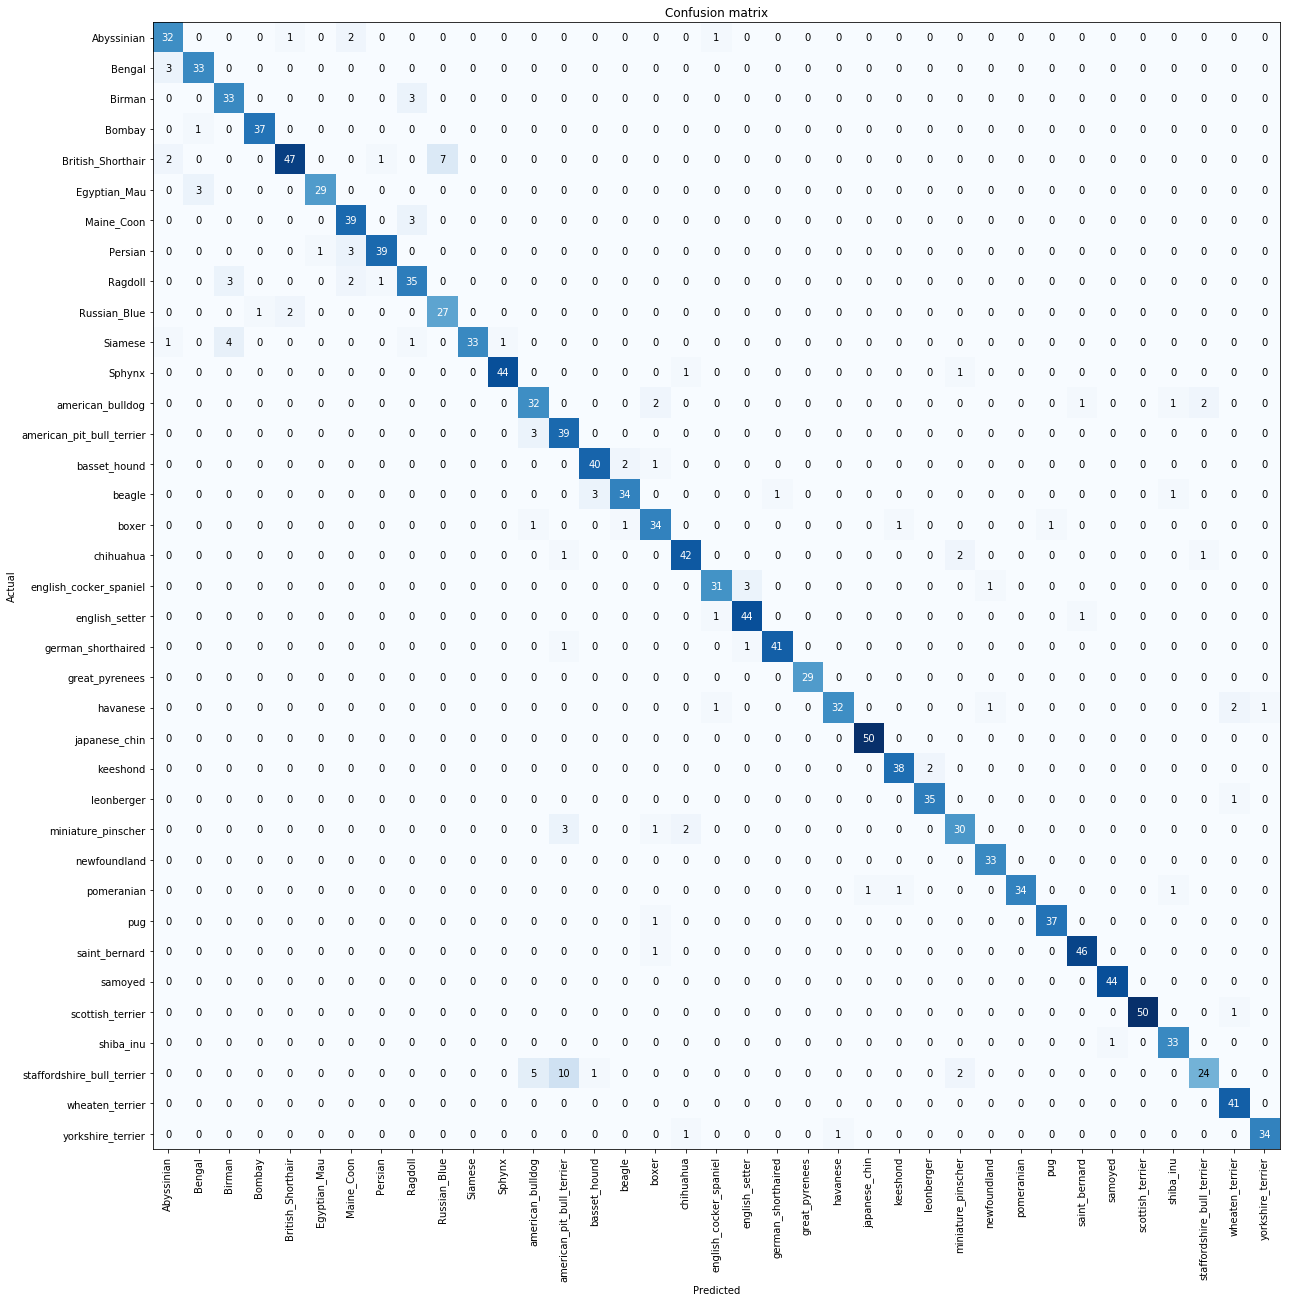

In [0]:
interp.plot_confusion_matrix(figsize=(20, 18))

In [0]:
interp.confusion_matrix()

array([[32,  0,  0,  0, ...,  0,  0,  0,  0],
       [ 3, 33,  0,  0, ...,  0,  0,  0,  0],
       [ 0,  0, 33,  0, ...,  0,  0,  0,  0],
       [ 0,  1,  0, 37, ...,  0,  0,  0,  0],
       ...,
       [ 0,  0,  0,  0, ..., 33,  0,  0,  0],
       [ 0,  0,  0,  0, ...,  0, 24,  0,  0],
       [ 0,  0,  0,  0, ...,  0,  0, 41,  0],
       [ 0,  0,  0,  0, ...,  0,  0,  0, 34]])

In [0]:
sum([np.max(l) for l  in interp.confusion_matrix()]) / len(values)

0.9167794316644113